In [2]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [3]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [4]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [5]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [6]:
# Null: The Section 3 average is like the average of 27 random scores from the class.

# Alternative: No, it's too low.

In [7]:
# observed statistic

observed_average = 13.6667

In [8]:
np.average(scores.sample(27, with_replacement=False).column('Midterm'))

15.777777777777779

In [9]:
averages = make_array()

repetitions = 50000
for i in np.arange(repetitions):
    new_average = np.average(scores.sample(27, with_replacement=False).column('Midterm'))
    averages = np.append(averages, new_average)

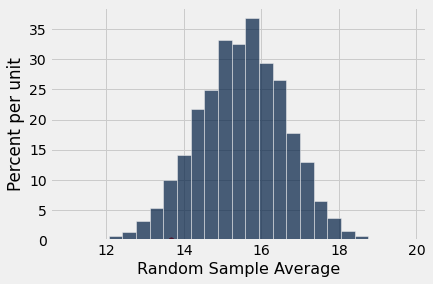

In [10]:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plots.scatter(observed_average, 0, color='red', s=30)

In [12]:
np.count_nonzero(averages <= observed_average) / repetitions

0.05864